In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the dataset
df = pd.read_csv('Training Data.csv')

In [3]:
df.head()

,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,...,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",2.869316,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,XXX.XXX.XXX.XXX,...,348010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,NaN,144,XXX.XXX.XXX.XXX,...,NaN,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN,True


In [4]:
#Let's check the info of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   clientid_cr                    965 non-null    int64  
 1   clmbuserid_cr                  965 non-null    object 
 2   conversiontime_cr              965 non-null    float64
 3   imprid_cr                      965 non-null    object 
 4   adslotdimid_cr                 965 non-null    int64  
 5   algo_cr                        945 non-null    float64
 6   audiences_cr                   766 non-null    object 
 7   clickbid_cr                    669 non-null    float64
 8   geodimid_cr                    965 non-null    int64  
 9   ip_cr                          945 non-null    object 
 10  itemcolumbiaid_cr              965 non-null    int64  
 11  itemid_cr                      965 non-null    int64  
 12  position_cr                    945 non-null    flo

In [5]:
#droping the columns with less numbers of features
df = df.drop(['deviceId_cr','uvh_cr','platformId_cr','sdkVersion_cr',
              'usrClusterId_cr','cityGrpDimId_cr','paid_cr','spend_cr',
              'attributionType_cr','conversionid_cr','optimize_on_cr','bundleId_cr','stateGrpDimId_cr','ip_cr'], axis=1)

In [6]:
df.shape

(965, 42)

In [7]:
#let's find out null values
df.isna().sum()

clientid_cr                        0
clmbuserid_cr                      0
conversiontime_cr                  0
imprid_cr                          0
adslotdimid_cr                     0
algo_cr                           20
audiences_cr                     199
clickbid_cr                      296
geodimid_cr                        0
itemcolumbiaid_cr                  0
itemid_cr                          0
position_cr                       20
pubclientid_cr                     0
refurl_cr                        125
siteId_cr                          0
templateid_cr                    107
goalid_cr                          0
time_cr                            0
adLogType_cr                       0
v_cr                               1
allAudiences_cr                   47
pricingtype_cr                     0
osId_cr                           21
browserId_cr                      21
cityId_cr                         20
stateId_cr                        20
modelDimId_cr                     21
l

In [8]:
#droping the columns with higher null values
df = df.drop(['uv_cr','siteClusterIds_cr','refClusterId_cr','clickbid_cr'], axis=1)

In [9]:
#we can drop the null values but I chose to fill with median and storing it in new dataframe
df_new = df.fillna(df.median())

In [10]:
df_new.head()

,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,...,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",144,5488088,49504155,...,280429.0,144.0,10,2332.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",144,5488773,49504157,...,136127.0,144.0,10,3201.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",144,5488088,49504160,...,172725.0,144.0,10,2821.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",144,5488088,49504155,...,136127.0,144.0,10,3144.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,144,5614054,53607445,...,136127.0,144.0,10,42597.0,1.620000e+12,1.620000e+12,360833.0,1.0,348011.0,True


In [11]:
#checking if there any other null values left
df_new.isna().sum()

clientid_cr                        0
clmbuserid_cr                      0
conversiontime_cr                  0
imprid_cr                          0
adslotdimid_cr                     0
algo_cr                            0
audiences_cr                     199
geodimid_cr                        0
itemcolumbiaid_cr                  0
itemid_cr                          0
position_cr                        0
pubclientid_cr                     0
refurl_cr                        125
siteId_cr                          0
templateid_cr                      0
goalid_cr                          0
time_cr                            0
adLogType_cr                       0
v_cr                               0
allAudiences_cr                   47
pricingtype_cr                     0
osId_cr                            0
browserId_cr                       0
cityId_cr                          0
stateId_cr                         0
modelDimId_cr                      0
lookUpFrom_cr                      0
c

In [12]:
# def converter(resul):
#     if resul == True:
#         return 1
#     else:
#         return 0

In [13]:
#df_new['conversion_fraud'] = df_new['conversion_fraud'].apply(converter)

In [14]:
df_new.head()

,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,geodimid_cr,itemcolumbiaid_cr,itemid_cr,...,ispDimId_cr,countryDimId_cr,goalTypeId_cr,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",144,5488088,49504155,...,280429.0,144.0,10,2332.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",144,5488773,49504157,...,136127.0,144.0,10,3201.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",144,5488088,49504160,...,172725.0,144.0,10,2821.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",144,5488088,49504155,...,136127.0,144.0,10,3144.0,1.620000e+12,1.620000e+12,199452.0,1.0,348011.0,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,144,5614054,53607445,...,136127.0,144.0,10,42597.0,1.620000e+12,1.620000e+12,360833.0,1.0,348011.0,True


In [15]:
df_new['conversion_fraud'].value_counts()

False    834
True     131
Name: conversion_fraud, dtype: int64

In [16]:
#droping the feature of object type and also null values
df_new = df_new.drop(['clmbuserid_cr','imprid_cr','audiences_cr','refurl_cr','allAudiences_cr','connTypeDimId_cr'], axis=1)

## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#Seperating lable and features
X = df_new.drop('conversion_fraud', axis=1)
y = df_new['conversion_fraud']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Models and predictions

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
prediction = model.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[170   0]
 [ 23   0]]


              precision    recall  f1-score   support

       False       0.88      1.00      0.94       170
        True       0.00      0.00      0.00        23

    accuracy                           0.88       193
   macro avg       0.44      0.50      0.47       193
weighted avg       0.78      0.88      0.83       193



c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As Logistic Regression is not performing well here, So we will try with Random Forest and KNN

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier()

In [28]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
pred = rf.predict(X_test)

In [30]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[168   2]
 [ 12  11]]


              precision    recall  f1-score   support

       False       0.93      0.99      0.96       170
        True       0.85      0.48      0.61        23

    accuracy                           0.93       193
   macro avg       0.89      0.73      0.79       193
weighted avg       0.92      0.93      0.92       193



In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# As we are uncertain about number of neighbors so will use it with as list and compare the errors
error_rate = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

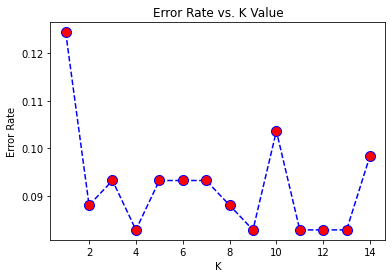

In [33]:
#Plotting the errors
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
# As from plot, at 4 the error was minimum so we will choose n_neighbors=4
knn = KNeighborsClassifier(n_neighbors=4)

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [42]:
predi = knn.predict(X_test)

In [43]:
print(confusion_matrix(y_test,predi))
print('\n')
print(classification_report(y_test,predi))

[[168   2]
 [ 14   9]]


              precision    recall  f1-score   support

       False       0.92      0.99      0.95       170
        True       0.82      0.39      0.53        23

    accuracy                           0.92       193
   macro avg       0.87      0.69      0.74       193
weighted avg       0.91      0.92      0.90       193



As the Random Forest Clssifier performed well for both values, So we will use it as final model

## dump the model for further use

In [38]:
import pickle

In [39]:
file_name = 'Conversion fraud in Digital Advertising.sav'
pickle.dump(rf, open(file_name, 'wb'))